In [5]:
import tensorflow as tf

tf.enable_eager_execution()

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
classification_folder = "../../classification/train_png.txt"
data_folder = "../../dataset/Train_Padding_LU_G_200/"
labels = pd.read_csv( classification_folder, header = None )
labels.columns = ['filename', 'class']
id_to_class = ['good', 'bad', 'ugly']
labels['class'] = labels['class'].map( lambda x : id_to_class.index(x) )

In [8]:
labels.sort_values(by='filename').head()

,filename,class
299,sismoMod_Exp_00000001.png,1
257,sismoMod_Exp_00000002.png,1
1653,sismoMod_Exp_00000003.png,1
4203,sismoMod_Exp_00000004.png,0
389,sismoMod_Exp_00000005.png,2


In [9]:
data = tf.data.Dataset.list_files(data_folder+"*.png", shuffle=False)
print(data)
for f in data.take(5):
  print(f.numpy())

<DatasetV1Adapter shapes: (), types: tf.string>
b'../../dataset/Train_Padding_LU_G_200/sismoMod_Exp_00000001.png'
b'../../dataset/Train_Padding_LU_G_200/sismoMod_Exp_00000002.png'
b'../../dataset/Train_Padding_LU_G_200/sismoMod_Exp_00000003.png'
b'../../dataset/Train_Padding_LU_G_200/sismoMod_Exp_00000004.png'
b'../../dataset/Train_Padding_LU_G_200/sismoMod_Exp_00000005.png'


In [10]:
data = tf.data.Dataset.from_tensor_slices( (labels.sort_values(by='filename')['filename'].values, labels.sort_values(by='filename')['class'].values) )

In [24]:
def process_path(filename,label):
    img1 = tf.io.read_file(data_folder+filename)
    img1 = tf.image.decode_image(img1)
    img1 = tf.image.rgb_to_grayscale(img1)
    #img1  = tf.math.reduce_mean(img1, 2)
    
    img1 = tf.cast(2 * (img1 / 255 - 0.5), tf.float32)
    return img1, label

dataset = data.map(process_path)

In [25]:
for image_raw, label in dataset.take(1):
  #plt.imshow(image_raw, cmap='gray')
  plt.show()
  print(image_raw,label)

tf.Tensor(
[[[ 0.02745104]
  [ 0.02745104]
  [-0.06666666]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]

 [[-0.4980392 ]
  [-0.2862745 ]
  [-0.01960784]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]

 [[-0.4588235 ]
  [-0.2235294 ]
  [-0.12941176]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]

 ...

 [[ 0.06666672]
  [ 0.0196079 ]
  [ 0.00392163]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]

 [[-0.00392157]
  [-0.01176471]
  [-0.01960784]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]

 [[-0.05882353]
  [-0.02745098]
  [-0.01176471]
  ...
  [ 0.00392163]
  [ 0.00392163]
  [ 0.00392163]]], shape=(200, 200, 1), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [13]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  return  ndimage.rotate(image, np.random.uniform(-30,30), reshape=False)

def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,]= tf.py_func(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(299, 299), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


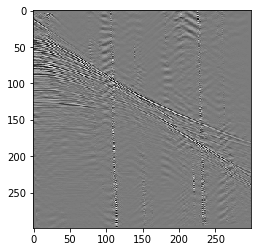

In [324]:
rot_ds = dataset.map(tf_random_rotate_image)

for image, label in rot_ds.take(1):
  print(image, label)
  plt.imshow(image, cmap='gray')

In [331]:
def plot_batch_sizes(ds):
  batch_sizes = [batch[0] for batch in ds]
  print(batch_sizes)
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

In [334]:
titanic_batches = dataset.batch(128)
for batch in titanic_batches:
    print(batch)

(<tf.Tensor: id=13718, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.15294117, -0.25490195, -0.18431371, ...,  0.00392163,
          0.0196079 ,  0.0196079 ],
        [ 0.3803922 ,  0.4901961 ,  0.37254906, ..., -0.00392157,
          0.01176476,  0.0196079 ],
        [ 1.        ,  0.8509804 ,  0.88235295, ...,  0.03529418,
          0.00392163, -0.00392157],
        ...,
        [-0.12941176, -0.11372548, -0.0745098 , ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [-0.01960784, -0.01960784, -0.01960784, ...,  0.01176476,
          0.01176476,  0.01176476],
        [ 0.01176476,  0.00392163,  0.00392163, ...,  0.00392163,
          0.00392163,  0.00392163]],

       [[-0.27058822, -0.11372548,  0.05098045, ...,  0.01176476,
          0.02745104,  0.0196079 ],
        [ 0.01176476,  0.3176471 ,  0.5764706 , ...,  0.0196079 ,
          0.01176476,  0.0196079 ],
        [ 0.49803925,  0.62352943,  0.35686278, ...,  0.00392163,
          0.03529418,  0.01176476],

(<tf.Tensor: id=13726, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.4901961 ,  0.654902  ,  0.14509809, ..., -0.02745098,
         -0.01176471, -0.00392157],
        [ 0.85882354,  0.5764706 ,  0.70980394, ..., -0.00392157,
          0.00392163,  0.00392163],
        [ 0.56078434,  0.85882354,  0.38823533, ...,  0.04313731,
          0.0196079 , -0.00392157],
        ...,
        [ 0.05098045,  0.06666672,  0.09803927, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [ 0.01176476,  0.0196079 ,  0.01176476, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [-0.01960784, -0.01176471, -0.01176471, ..., -0.01176471,
         -0.01176471, -0.01176471]],

       [[-0.12941176, -0.10588235,  0.09803927, ...,  0.00392163,
         -0.00392157, -0.00392157],
        [ 0.5764706 ,  0.70980394,  0.14509809, ..., -0.01176471,
         -0.00392157, -0.00392157],
        [ 0.6627451 , -0.05098039,  0.35686278, ..., -0.00392157,
          0.00392163, -0.00392157],

(<tf.Tensor: id=13734, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.11372548, -0.11372548, -0.09019607, ..., -0.05098039,
         -0.04313725, -0.01960784],
        [-0.2235294 , -0.21568626, -0.20784312, ..., -0.01176471,
         -0.02745098, -0.01960784],
        [-0.24705881, -0.26274508, -0.18431371, ...,  0.07450986,
          0.03529418, -0.00392157],
        ...,
        [ 0.0196079 ,  0.07450986,  0.12941182, ...,  0.00392163,
          0.0196079 ,  0.06666672],
        [-0.02745098, -0.00392157,  0.02745104, ..., -0.01176471,
         -0.01960784, -0.01176471],
        [-0.00392157, -0.01176471, -0.01960784, ..., -0.01176471,
         -0.01176471, -0.01176471]],

       [[ 0.60784316,  0.64705884, -0.05098039, ..., -0.00392157,
         -0.01960784, -0.02745098],
        [ 0.6784314 ,  0.3411765 ,  0.64705884, ..., -0.01176471,
         -0.00392157, -0.00392157],
        [ 0.5764706 ,  1.        ,  0.2313726 , ...,  0.00392163,
         -0.01176471, -0.00392157],

(<tf.Tensor: id=13742, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.05098039, -0.06666666, -0.01176471, ...,  0.01176476,
          0.0196079 ,  0.03529418],
        [-0.12941176, -0.11372548, -0.0745098 , ...,  0.04313731,
          0.05882359,  0.04313731],
        [-0.21568626, -0.1607843 , -0.09803921, ...,  0.05882359,
          0.04313731,  0.04313731],
        ...,
        [ 0.06666672,  0.05882359,  0.05098045, ...,  0.03529418,
          0.03529418,  0.03529418],
        [ 0.01176476,  0.01176476,  0.01176476, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [ 0.00392163,  0.00392163,  0.01176476, ...,  0.01176476,
          0.01176476,  0.01176476]],

       [[ 0.0196079 , -0.05882353, -0.05098039, ...,  0.01176476,
          0.00392163, -0.00392157],
        [ 0.21568632,  0.10588241,  0.00392163, ...,  0.01176476,
          0.0196079 ,  0.0196079 ],
        [ 0.33333337,  0.2313726 ,  0.10588241, ...,  0.0196079 ,
          0.0196079 ,  0.00392163],

(<tf.Tensor: id=13750, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.05882353, -0.10588235, -0.11372548, ..., -0.01960784,
         -0.01960784, -0.02745098],
        [ 0.02745104, -0.01176471, -0.08235294, ..., -0.01960784,
         -0.01960784, -0.01176471],
        [ 0.0196079 , -0.02745098,  0.0196079 , ..., -0.01176471,
         -0.00392157, -0.00392157],
        ...,
        [ 0.04313731,  0.04313731,  0.01176476, ..., -0.02745098,
         -0.03529412, -0.03529412],
        [ 0.00392163, -0.00392157, -0.00392157, ..., -0.01960784,
         -0.02745098, -0.02745098],
        [-0.01960784, -0.01960784, -0.01960784, ..., -0.00392157,
         -0.01176471, -0.01176471]],

       [[-0.21568626, -0.14509803, -0.15294117, ...,  0.00392163,
         -0.01176471, -0.00392157],
        [-0.20784312, -0.09019607,  0.0196079 , ...,  0.03529418,
          0.05098045,  0.04313731],
        [ 0.5764706 ,  0.6       ,  0.41960788, ...,  0.03529418,
          0.04313731,  0.03529418],

(<tf.Tensor: id=13758, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.5137255 ,  0.5529412 , -0.24705881, ...,  0.00392163,
          0.00392163,  0.00392163],
        [ 0.22352946, -0.16862744,  0.20000005, ...,  0.03529418,
          0.03529418,  0.0196079 ],
        [ 0.27843142,  0.6392157 ,  0.4901961 , ...,  0.01176476,
          0.00392163,  0.00392163],
        ...,
        [ 0.00392163,  0.01176476,  0.02745104, ...,  0.00392163,
          0.00392163,  0.00392163],
        [-0.00392157, -0.00392157,  0.00392163, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [-0.01176471, -0.01176471, -0.01176471, ..., -0.01176471,
         -0.01176471, -0.01176471]],

       [[ 0.7882353 ,  0.8039216 ,  0.5686275 , ..., -0.01176471,
         -0.01960784, -0.01960784],
        [ 0.9529412 ,  0.54509807,  0.6784314 , ..., -0.00392157,
         -0.00392157, -0.00392157],
        [ 0.41176474,  0.9607843 ,  0.03529418, ...,  0.00392163,
          0.00392163,  0.00392163],

(<tf.Tensor: id=13766, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.45882356,  0.4431373 ,  0.03529418, ...,  0.03529418,
          0.03529418,  0.03529418],
        [ 0.654902  ,  0.20000005,  0.8901961 , ...,  0.04313731,
          0.05098045,  0.05882359],
        [-0.1607843 ,  1.        ,  0.67058825, ...,  0.0196079 ,
          0.03529418,  0.03529418],
        ...,
        [ 0.09803927,  0.082353  ,  0.03529418, ...,  0.01176476,
          0.00392163, -0.00392157],
        [ 0.0196079 ,  0.01176476,  0.01176476, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [ 0.0196079 ,  0.01176476,  0.0196079 , ...,  0.0196079 ,
          0.0196079 ,  0.02745104]],

       [[ 0.34901965,  0.45882356, -0.0745098 , ...,  0.02745104,
          0.02745104,  0.02745104],
        [ 0.07450986, -0.08235294,  0.4431373 , ...,  0.0196079 ,
          0.0196079 ,  0.02745104],
        [ 0.45882356,  0.69411767,  0.2941177 , ...,  0.02745104,
          0.01176476, -0.00392157],

(<tf.Tensor: id=13774, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.12941176, -0.0745098 , -0.00392157, ...,  0.01176476,
          0.01176476,  0.00392163],
        [ 0.082353  , -0.00392157, -0.03529412, ...,  0.02745104,
          0.0196079 ,  0.0196079 ],
        [ 0.0196079 ,  0.00392163, -0.06666666, ...,  0.01176476,
          0.0196079 ,  0.02745104],
        ...,
        [-0.01960784, -0.01176471, -0.01176471, ...,  0.00392163,
          0.0196079 ,  0.03529418],
        [-0.01176471, -0.00392157, -0.00392157, ..., -0.00392157,
          0.00392163,  0.01176476],
        [ 0.00392163, -0.00392157, -0.00392157, ..., -0.00392157,
         -0.00392157, -0.01176471]],

       [[-0.10588235, -0.08235294, -0.1372549 , ...,  0.01176476,
          0.01176476,  0.00392163],
        [-0.14509803, -0.29411763, -0.4823529 , ...,  0.02745104,
          0.02745104,  0.03529418],
        [-0.19999999, -0.31764704, -0.25490195, ...,  0.02745104,
          0.03529418,  0.02745104],

(<tf.Tensor: id=13782, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.2235294 , -0.27058822, -0.19215685, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [-0.05882353,  0.02745104,  0.05098045, ...,  0.01176476,
          0.01176476,  0.01176476],
        [ 0.21568632,  0.13725495,  0.19215691, ...,  0.01176476,
          0.00392163,  0.01176476],
        ...,
        [ 0.00392163, -0.00392157,  0.00392163, ...,  0.01176476,
          0.01176476,  0.01176476],
        [-0.01176471, -0.01960784, -0.00392157, ..., -0.01176471,
         -0.01176471, -0.01176471],
        [-0.01960784, -0.00392157, -0.01176471, ..., -0.01960784,
         -0.01960784, -0.01176471]],

       [[ 0.02745104,  0.082353  , -0.01176471, ...,  0.01176476,
          0.02745104,  0.02745104],
        [ 0.33333337,  0.11372554,  0.09803927, ...,  0.02745104,
          0.03529418,  0.03529418],
        [ 0.60784316,  0.7019608 ,  0.3411765 , ...,  0.04313731,
          0.0196079 ,  0.02745104],

(<tf.Tensor: id=13790, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.48235297,  0.6156863 ,  0.23921573, ..., -0.00392157,
          0.00392163,  0.01176476],
        [ 0.78039217,  0.23921573,  0.36470592, ...,  0.00392163,
          0.01176476,  0.0196079 ],
        [ 0.06666672,  0.5686275 ,  0.6156863 , ...,  0.00392163,
          0.01176476,  0.01176476],
        ...,
        [ 0.04313731,  0.01176476, -0.01176471, ..., -0.01176471,
         -0.00392157,  0.00392163],
        [ 0.0196079 , -0.00392157, -0.01176471, ..., -0.01960784,
         -0.01960784, -0.00392157],
        [-0.01960784, -0.02745098, -0.01960784, ..., -0.01960784,
         -0.01960784, -0.01176471]],

       [[ 0.4901961 ,  0.654902  ,  0.04313731, ...,  0.00392163,
          0.00392163,  0.00392163],
        [ 0.5686275 ,  0.05882359,  0.70980394, ..., -0.00392157,
          0.01176476,  0.01176476],
        [-0.00392157,  1.        ,  0.4901961 , ...,  0.01176476,
         -0.00392157,  0.00392163],

(<tf.Tensor: id=13798, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.04313725, -0.01176471,  0.05098045, ...,  0.01176476,
          0.00392163,  0.00392163],
        [ 0.09803927,  0.02745104, -0.04313725, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [ 0.00392163, -0.02745098, -0.01960784, ...,  0.00392163,
         -0.00392157, -0.01176471],
        ...,
        [-0.03529412, -0.04313725, -0.03529412, ..., -0.02745098,
         -0.00392157,  0.0196079 ],
        [ 0.00392163, -0.00392157, -0.01176471, ..., -0.01960784,
         -0.01176471, -0.00392157],
        [-0.00392157, -0.00392157,  0.00392163, ..., -0.00392157,
         -0.01176471, -0.01176471]],

       [[ 0.23921573, -0.09019607, -0.09803921, ..., -0.01176471,
         -0.01176471, -0.01176471],
        [ 0.52156866,  0.5529412 ,  0.03529418, ..., -0.01176471,
         -0.01176471, -0.01176471],
        [ 0.4039216 ,  0.03529418,  0.64705884, ..., -0.01176471,
         -0.01176471, -0.01176471],

(<tf.Tensor: id=13806, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.41960788,  0.654902  , -0.16862744, ...,  0.01176476,
          0.0196079 ,  0.03529418],
        [ 0.45098042, -0.19999999,  0.30196083, ...,  0.0196079 ,
          0.03529418,  0.04313731],
        [ 0.09803927,  0.9137255 ,  0.4666667 , ...,  0.02745104,
          0.03529418,  0.02745104],
        ...,
        [ 0.05098045,  0.06666672,  0.06666672, ...,  0.02745104,
          0.02745104,  0.02745104],
        [ 0.01176476, -0.00392157,  0.02745104, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [ 0.01176476,  0.00392163,  0.01176476, ...,  0.00392163,
          0.00392163,  0.00392163]],

       [[-0.0745098 ,  0.00392163,  0.03529418, ..., -0.01176471,
         -0.01176471, -0.00392157],
        [-0.02745098, -0.01176471,  0.03529418, ..., -0.01176471,
          0.00392163,  0.00392163],
        [ 0.05882359, -0.02745098, -0.14509803, ...,  0.01176476,
         -0.00392157, -0.00392157],

(<tf.Tensor: id=13814, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.082353  ,  0.20000005,  0.19215691, ...,  0.00392163,
          0.01176476,  0.00392163],
        [ 0.02745104,  0.05098045, -0.08235294, ...,  0.01176476,
          0.00392163,  0.0196079 ],
        [-0.23137254, -0.25490195, -0.16862744, ...,  0.0196079 ,
          0.01176476,  0.0196079 ],
        ...,
        [ 0.00392163,  0.00392163,  0.0196079 , ...,  0.0196079 ,
          0.02745104,  0.02745104],
        [ 0.00392163, -0.00392157,  0.01176476, ...,  0.00392163,
          0.00392163,  0.00392163],
        [-0.01176471, -0.01176471, -0.00392157, ..., -0.01176471,
         -0.01176471, -0.01176471]],

       [[-0.05098039, -0.06666666, -0.15294117, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [ 0.01176476, -0.01960784,  0.10588241, ...,  0.01176476,
          0.00392163,  0.00392163],
        [ 0.54509807,  0.62352943,  0.32549024, ..., -0.00392157,
          0.01176476,  0.0196079 ],

(<tf.Tensor: id=13822, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.6156863 ,  0.7254902 , -0.03529412, ...,  0.03529418,
          0.03529418,  0.03529418],
        [ 0.3411765 , -0.09803921,  0.09019613, ...,  0.02745104,
          0.04313731,  0.05882359],
        [ 0.10588241,  0.2941177 ,  0.15294123, ...,  0.03529418,
          0.02745104,  0.0196079 ],
        ...,
        [ 0.00392163,  0.01176476,  0.02745104, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [-0.00392157,  0.00392163,  0.01176476, ...,  0.01176476,
          0.01176476,  0.01176476],
        [-0.00392157, -0.00392157, -0.00392157, ..., -0.00392157,
         -0.00392157, -0.00392157]],

       [[ 0.04313731,  0.00392163, -0.02745098, ..., -0.02745098,
         -0.01960784, -0.01960784],
        [ 0.1686275 ,  0.082353  , -0.01176471, ..., -0.01176471,
         -0.01176471, -0.00392157],
        [ 0.19215691,  0.1686275 , -0.16862744, ..., -0.00392157,
          0.00392163,  0.01176476],

(<tf.Tensor: id=13830, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.19215685, -0.06666666,  0.2313726 , ..., -0.00392157,
         -0.01176471, -0.01960784],
        [ 0.18431377,  0.24705887,  0.27843142, ...,  0.01176476,
          0.01176476,  0.00392163],
        [ 0.3411765 ,  0.2313726 , -0.19999999, ...,  0.02745104,
          0.0196079 ,  0.0196079 ],
        ...,
        [-0.01960784, -0.00392157,  0.03529418, ...,  0.01176476,
         -0.00392157, -0.01176471],
        [-0.01176471, -0.01176471, -0.00392157, ..., -0.01176471,
         -0.01960784, -0.01176471],
        [-0.00392157, -0.01960784, -0.01960784, ..., -0.01176471,
         -0.01176471, -0.01176471]],

       [[ 0.07450986,  0.01176476, -0.0745098 , ...,  0.00392163,
          0.00392163,  0.01176476],
        [ 0.00392163,  0.04313731,  0.03529418, ...,  0.0196079 ,
          0.0196079 ,  0.02745104],
        [ 0.0196079 , -0.03529412, -0.05882353, ...,  0.02745104,
          0.01176476,  0.00392163],

(<tf.Tensor: id=13838, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.16862744, -0.02745098,  0.05882359, ...,  0.00392163,
          0.01176476,  0.0196079 ],
        [-0.17647058, -0.12156862, -0.04313725, ...,  0.0196079 ,
          0.02745104,  0.03529418],
        [-0.09019607, -0.1607843 , -0.09019607, ..., -0.00392157,
          0.00392163,  0.01176476],
        ...,
        [ 0.0196079 ,  0.03529418,  0.03529418, ...,  0.01176476,
          0.01176476,  0.01176476],
        [-0.01176471, -0.00392157,  0.00392163, ...,  0.00392163,
          0.00392163,  0.00392163],
        [-0.01176471, -0.01960784, -0.00392157, ..., -0.00392157,
         -0.00392157, -0.00392157]],

       [[ 0.082353  ,  0.20784318,  0.27058828, ...,  0.03529418,
          0.0196079 ,  0.0196079 ],
        [ 0.6627451 ,  0.35686278,  0.8745098 , ...,  0.03529418,
          0.05098045,  0.04313731],
        [-0.16862744,  0.92941177,  0.1686275 , ...,  0.0196079 ,
          0.0196079 ,  0.04313731],

(<tf.Tensor: id=13846, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.17647058, -0.38039213, -0.40392154, ..., -0.00392157,
         -0.01176471, -0.00392157],
        [-0.1372549 , -0.3098039 , -0.01960784, ...,  0.00392163,
         -0.00392157,  0.01176476],
        [ 0.27843142,  0.52156866,  0.5921569 , ...,  0.0196079 ,
          0.03529418,  0.02745104],
        ...,
        [-0.00392157, -0.01176471, -0.01176471, ...,  0.01176476,
          0.01176476,  0.01176476],
        [-0.01176471, -0.01176471, -0.01176471, ..., -0.00392157,
         -0.00392157, -0.00392157],
        [-0.01176471, -0.01176471, -0.01960784, ..., -0.01960784,
         -0.01960784, -0.01960784]],

       [[ 0.88235295,  0.8352941 ,  0.00392163, ..., -0.01176471,
         -0.01176471, -0.01176471],
        [ 0.8509804 ,  0.12941182,  0.45882356, ..., -0.01176471,
         -0.01176471,  0.00392163],
        [ 0.1686275 ,  1.        ,  0.5764706 , ..., -0.00392157,
          0.00392163,  0.00392163],

(<tf.Tensor: id=13854, shape=(128, 299, 299), dtype=float32, numpy=
array([[[ 0.90588236,  0.96862745,  0.16078436, ...,  0.01176476,
          0.0196079 ,  0.01176476],
        [ 1.        ,  0.30980396,  0.6313726 , ...,  0.01176476,
          0.00392163,  0.00392163],
        [ 0.0196079 ,  1.        ,  0.62352943, ...,  0.01176476,
          0.01176476,  0.0196079 ],
        ...,
        [ 0.04313731,  0.05098045,  0.05098045, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [ 0.01176476,  0.02745104,  0.03529418, ...,  0.00392163,
          0.00392163,  0.00392163],
        [-0.00392157, -0.01176471, -0.01176471, ..., -0.00392157,
         -0.00392157, -0.00392157]],

       [[ 0.0196079 ,  0.09803927,  0.05098045, ...,  0.01176476,
         -0.00392157, -0.01176471],
        [ 0.12156868,  0.05098045,  0.13725495, ...,  0.0196079 ,
          0.01176476,  0.0196079 ],
        [ 0.23921573,  0.38823533,  0.24705887, ...,  0.04313731,
          0.05098045,  0.05882359],

(<tf.Tensor: id=13862, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.12941176, -0.08235294, -0.10588235, ..., -0.01960784,
         -0.01176471, -0.01176471],
        [ 0.05882359,  0.05882359,  0.02745104, ...,  0.01176476,
          0.00392163,  0.00392163],
        [ 0.5294118 ,  0.5294118 ,  0.3803922 , ..., -0.00392157,
          0.00392163,  0.01176476],
        ...,
        [-0.01176471,  0.00392163,  0.00392163, ..., -0.01960784,
         -0.01176471,  0.00392163],
        [ 0.00392163,  0.00392163,  0.01176476, ..., -0.01176471,
         -0.00392157,  0.00392163],
        [-0.01176471, -0.00392157, -0.00392157, ..., -0.01176471,
         -0.01176471, -0.00392157]],

       [[-0.05098039, -0.08235294, -0.05882353, ..., -0.00392157,
         -0.01176471, -0.00392157],
        [-0.05098039, -0.05882353, -0.01176471, ..., -0.01176471,
         -0.00392157, -0.00392157],
        [-0.06666666, -0.01176471, -0.01176471, ...,  0.01176476,
          0.00392163,  0.00392163],

(<tf.Tensor: id=13870, shape=(128, 299, 299), dtype=float32, numpy=
array([[[-0.09803921, -0.05098039, -0.1372549 , ..., -0.00392157,
          0.01176476,  0.00392163],
        [ 0.06666672,  0.01176476,  0.082353  , ...,  0.0196079 ,
          0.02745104,  0.01176476],
        [ 0.4039216 ,  0.5058824 ,  0.4039216 , ...,  0.02745104,
          0.01176476,  0.00392163],
        ...,
        [ 0.03529418,  0.01176476,  0.00392163, ...,  0.0196079 ,
          0.01176476,  0.00392163],
        [ 0.01176476, -0.00392157, -0.00392157, ...,  0.00392163,
          0.00392163,  0.00392163],
        [-0.01176471, -0.01960784, -0.01176471, ..., -0.01960784,
         -0.01176471, -0.01176471]],

       [[-0.14509803, -0.09019607, -0.06666666, ..., -0.01960784,
         -0.01176471, -0.01176471],
        [-0.03529412, -0.0745098 , -0.05882353, ..., -0.01960784,
         -0.00392157, -0.00392157],
        [ 0.04313731,  0.0196079 , -0.02745098, ..., -0.00392157,
         -0.01176471, -0.01176471],

(<tf.Tensor: id=13878, shape=(104, 299, 299), dtype=float32, numpy=
array([[[ 0.16078436,  0.02745104, -0.15294117, ...,  0.03529418,
          0.03529418,  0.01176476],
        [ 0.05882359, -0.09803921,  0.01176476, ...,  0.03529418,
          0.0196079 ,  0.01176476],
        [ 0.07450986,  0.41176474,  0.12941182, ...,  0.0196079 ,
          0.00392163,  0.01176476],
        ...,
        [-0.08235294, -0.08235294, -0.09019607, ...,  0.02745104,
          0.02745104,  0.02745104],
        [-0.02745098, -0.01960784, -0.01960784, ...,  0.0196079 ,
          0.0196079 ,  0.0196079 ],
        [ 0.00392163,  0.01176476,  0.01176476, ...,  0.00392163,
          0.00392163,  0.00392163]],

       [[-0.34117645, -0.3098039 ,  0.0196079 , ...,  0.01176476,
          0.0196079 ,  0.0196079 ],
        [ 0.06666672,  0.34901965,  0.05098045, ...,  0.01176476,
          0.02745104,  0.03529418],
        [ 0.5058824 ,  0.07450986,  0.28627455, ...,  0.03529418,
          0.0196079 ,  0.00392163],

In [ ]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [ ]:
def read_image(image_filename):
    vdata = None
    if image_filename.endswith('.jpg') or image_filename.endswith('.png'):
        image = cv2.imread( data_folder + str(image_filename) )
        # Convert to Pillow module
        image = Image.fromarray( image )
        # image to numpy array
        imdata = image.getdata( )
        imsize = image.size
        vdata = np.array( imdata )
        # Corrigindo o tamanho para as novas imagens g2_...
        vdata = np.mean( vdata, axis = 1 )
        # sets all images to (-1,+1) range
        vdata = 2 * (vdata / 254.0 - 0.5)
        # reshape
        vdata = vdata.reshape( (imsize[0], imsize[1], 1) )
    return vdata

In [ ]:
f = '/home/betine-pro/Documents/QualitySismogram/classificacao_sismo/dataset/Train_Padding_G/' + labels['filename']
path_ds = tf.data.Dataset.from_tensor_slices(f.values)

In [ ]:
class_to_id = {"good":0, "bad":1, "ugly":2}
def load_labels(_class):
    return class_to_id[_class]

In [ ]:
filename = 'test.tfrecord'
writer = tf.python_io.TFRecordWriter(filename)

for index, file in labels[:10].iterrows():
    filename = read_image( file.filename )
    label = load_labels( file['class'] )
    
    h, w, c = filename.shape
    filename = filename.reshape((h*w,1))
    print(filename)

    
    feature = {
        'image' : _float_feature(filename),
        'label' : _int64_feature(label)
    }
    
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))

    #writer.write( example_proto.SerializeToString() )

    
writer.close()

In [ ]:
def fn_parser(record):
    keys_to_feature = {
        'image' : tf.FixedLenFeature([], tf.float32 ),
        'label' : tf.FixedLenFeature([], tf.int64 )
    }
    
    parsed = tf.parse_single_example(record, keys_to_feature)
    
    image = tf.cast(parsed["image"], tf.float32)
    print(image.shape)
    #image = tf.reshape( image, shape=[1000,1000])
    label = tf.cast(parsed["label"], tf.int64)
    print(label)
    
    return image, label

In [ ]:
filename = 'test.tfrecord'
dataset = tf.data.TFRecordDataset(filenames=filename)
dataset = dataset.map(fn_parser)
#dataset = dataset.batch(64)

iterator = dataset.make_initializable_iterator()
el = iterator.get_next()

print(img_batch, label_batch)

In [ ]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(iterator.initializer))

In [ ]:
print(sess.run(el))

In [ ]:
for serialized_example in tf.python_io.tf_record_iterator('test.tfrecord'):
    example = tf.train.Example()
    example.ParseFromString(serialized_example)
    x_1 = np.array(example.features.feature['image'].float_list.value)
    y_1 = np.array(example.features.feature['label'].float_list.value)
    break

In [ ]:
x_1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices( (images, labels) )
dataset = dataset.shuffle( len( filename ) )
'''
dataset = dataset.map(
    lambda filename, label : tuple( tf.py_func(
        self._py_function, [filename, label], [tf.float32, tf.int64] ) ),
    num_parallel_calls=8
)
'''
#dataset = dataset.cache()
dataset = dataset.batch( params.num_epochs )
dataset = dataset.prefetch(1)
self.iterator = dataset.make_initializable_iterator( )
x, y = self.iterator.get_next( )
#x = tf.placeholder( tf.float32, shape = (None, width, height, 1), name = 'X' )
# integer class output
#y = tf.placeholder( tf.int64, shape = (None,), name = 'Y' )
x = tf.reshape(x, [-1,width,height,1])
y = tf.reshape(y, [-1,])